<a href="https://colab.research.google.com/github/RohanNemade/Microbes-Classifier/blob/main/Microbe_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## RUN ONLY ONCE ##

## To extract files from a zipfile in Gdrive to a folder in Gdrive
"""
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Data Science/microbes_images (labelled).zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Data Science/Images_all")
zip_ref.close()
"""

In [ ]:
## Dealing with the labels first
import pandas as pd
labels = pd.read_csv("/content/drive/My Drive/Data Science/labels.csv")
img_list = list(labels["id"])
label_list = list(labels["label"])
print(labels.head())
print(len(img_list))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Converting data in the required format
x = []
raw_y = [] # raw_y is y before onehotencoding

path = "/content/drive/My Drive/Data Science/Images_all/"

for img_name in img_list:
    temp_path = path + str(img_name)
    image = cv2.resize(cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE), (128,128))
    x.append(image)
    string = img_name
    string = string[1:-4]
    raw_y.append(label_list[int(string) - 1])

x = np.array(x)

In [ ]:
# One hot encoding y
y = []

for i in range(len(raw_y)):
    num = raw_y[i] - 1
    temp = [0] * 14
    temp[num] = 1
    y.append(temp)

y = np.array(y)

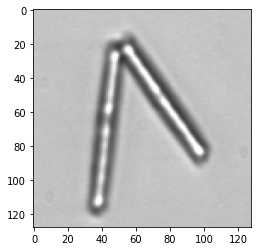

In [ ]:
# Conforming if everything is correct
plt.imshow(x[546], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
x = x.reshape(10600,128,128,1)  # 4-D input for keras format = (samples_in dataset, image_height, image_width, number_of_channels)
x.shape

(10600, 128, 128, 1)

In [ ]:
# Normalizing inputs
x = x/255.0 
# x = x/127.5 - 1

In [ ]:
# Splitting the dataset in training set and validation set (80 - 20 split in this case)
x_train = x[0 : 8480]
x_val = x[8480 :]
y_train = y[0 : 8480]
y_val = y[8480 :] 
# We split directly since the dataset is already randomly arranged

In [ ]:
# Saving the variables 
import pickle
pickle.dump([x_train, x_val, y_train, y_val], open("/content/drive/My Drive/Data Science/program files/xy_vars.p", "wb"))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(128,128,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten()) 

model.add(Dense(4608, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [ ]:
model.save("/content/drive/My Drive/Data Science/program files")

In [ ]:
#################################################################################

## Here we change runtime from CPU to GPU / TPU for faster execution ##

#################################################################################

In [ ]:
import keras
import pickle

In [ ]:
# load variables
x_train, x_val, y_train, y_val = pickle.load(open("/content/drive/My Drive/Data Science/program files/xy_vars.p","rb"))

In [ ]:
# load model
model = keras.models.load_model('/content/drive/My Drive/Data Science/program files')

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # first 10 epoch on batch_size = 64

Epoch 1/10
133/133 [==============================] - 29s 216ms/step - loss: 2.2181 - accuracy: 0.2195 - val_loss: 1.3658 - val_accuracy: 0.5108
Epoch 2/10
133/133 [==============================] - 27s 206ms/step - loss: 1.0698 - accuracy: 0.6291 - val_loss: 0.9316 - val_accuracy: 0.6840
Epoch 3/10
133/133 [==============================] - 27s 206ms/step - loss: 0.6888 - accuracy: 0.7697 - val_loss: 0.7644 - val_accuracy: 0.7415
Epoch 4/10
133/133 [==============================] - 28s 207ms/step - loss: 0.4775 - accuracy: 0.8390 - val_loss: 0.4791 - val_accuracy: 0.8519
Epoch 5/10
133/133 [==============================] - 28s 207ms/step - loss: 0.3639 - accuracy: 0.8791 - val_loss: 0.4071 - val_accuracy: 0.8651
Epoch 6/10
133/133 [==============================] - 28s 207ms/step - loss: 0.2708 - accuracy: 0.9087 - val_loss: 0.3725 - val_accuracy: 0.8792
Epoch 7/10
133/133 [==============================] - 27s 206ms/step - loss: 0.2295 - accuracy: 0.9226 - val_loss: 0.4413 - val_ac

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_val, y_val)) # next 10 epochs on batch_size = 256

Epoch 1/10
34/34 [==============================] - 23s 690ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.3994 - val_accuracy: 0.9005
Epoch 2/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.4485 - val_accuracy: 0.9033
Epoch 3/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.4705 - val_accuracy: 0.9038
Epoch 4/10
34/34 [==============================] - 23s 679ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.4965 - val_accuracy: 0.8892
Epoch 5/10
34/34 [==============================] - 23s 678ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.5094 - val_accuracy: 0.9024
Epoch 6/10
34/34 [==============================] - 23s 679ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.5659 - val_accuracy: 0.8995
Epoch 7/10
34/34 [==============================] - 23s 678ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.5712 - val_accuracy: 0.9066